In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [127]:
df = pd.read_csv("features_3_sec.csv")

In [128]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [130]:
df.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
length,9990.0,66149.000000,0.000000,6.614900e+04,66149.000000,66149.000000,66149.000000,66149.000000
chroma_stft_mean,9990.0,0.379534,0.090466,1.071078e-01,0.315698,0.384741,0.442443,0.749481
chroma_stft_var,9990.0,0.084876,0.009637,1.534475e-02,0.079833,0.085108,0.091092,0.120964
rms_mean,9990.0,0.130859,0.068545,9.534877e-04,0.083782,0.121253,0.176328,0.442567
rms_var,9990.0,0.002676,0.003586,4.379535e-08,0.000615,0.001491,0.003131,0.032615


In [131]:
df.isnull().sum().any()

False

### EDA

<Axes: >

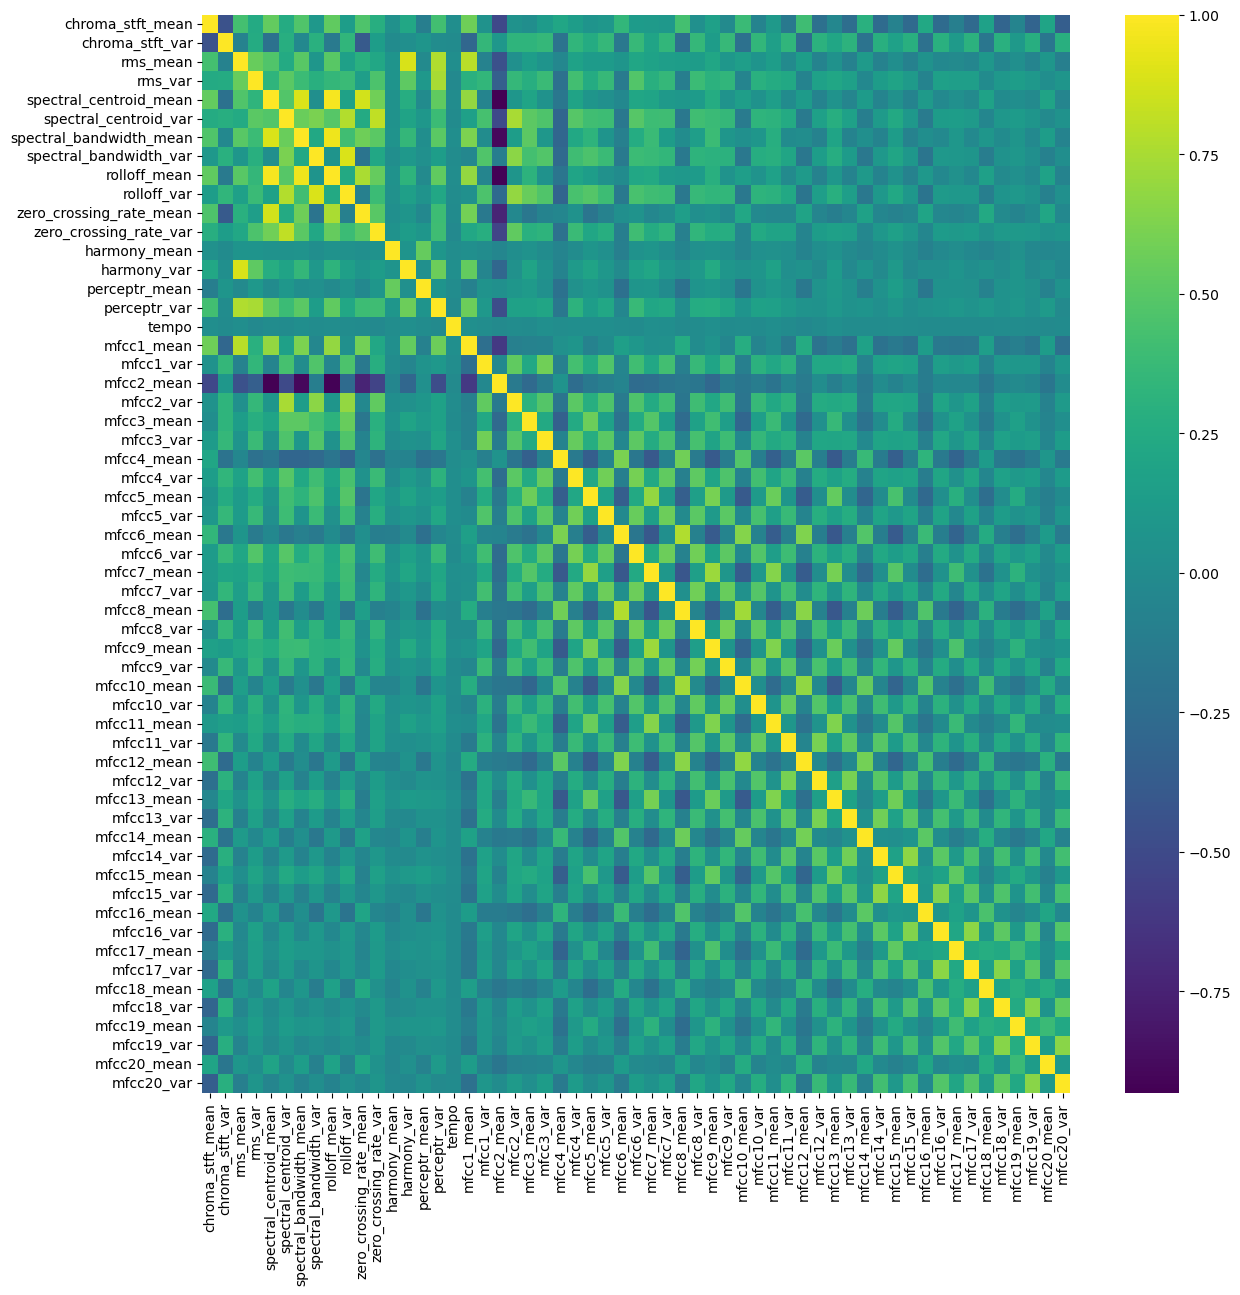

In [132]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.select_dtypes(include="float").corr(), cmap="viridis")

<Axes: xlabel='spectral_centroid_mean', ylabel='spectral_bandwidth_mean'>

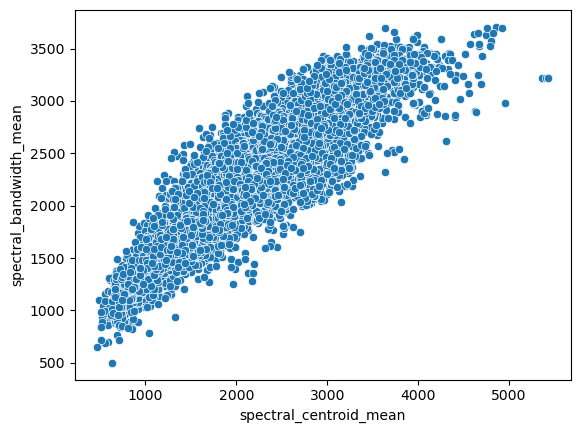

In [133]:
sns.scatterplot(data=df, x="spectral_centroid_mean", y="spectral_bandwidth_mean")

<Axes: xlabel='spectral_centroid_mean', ylabel='rolloff_mean'>

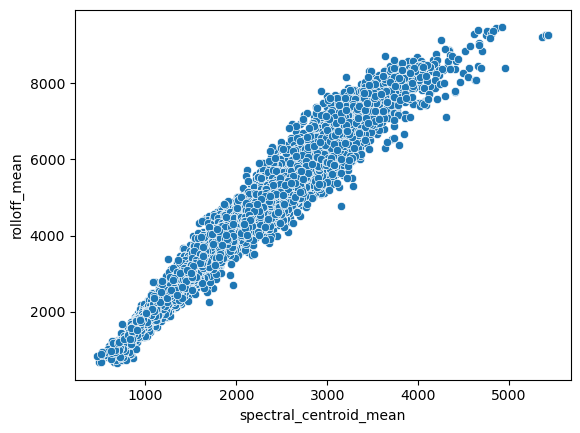

In [134]:
sns.scatterplot(data=df, x="spectral_centroid_mean", y="rolloff_mean")

<Axes: xlabel='rolloff_mean', ylabel='mfcc2_mean'>

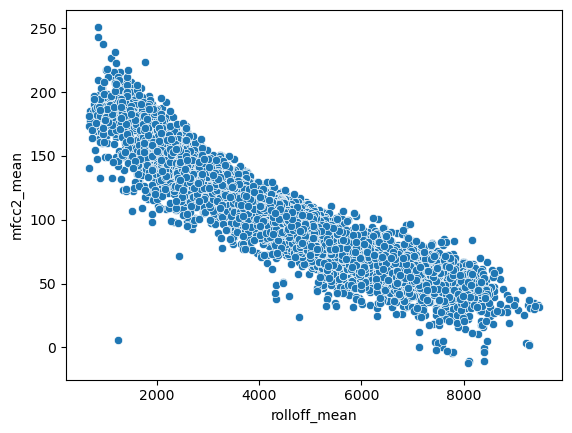

In [135]:
sns.scatterplot(data=df, x="rolloff_mean", y="mfcc2_mean")

In [136]:
df_genre = df.drop(["filename", "length"], axis=1).groupby("label").mean()
df_genre

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
label,,,,,,,,,,,,,,,,,,,,,
blues,0.342438,0.089851,0.136025,0.002624,1726.067889,245598.219597,1930.849650,95125.688781,3632.913078,1.274768e+06,...,0.738590,54.161615,-7.628242,55.628034,-1.052426,57.308816,-3.878884,59.144771,-2.527042,61.892176
classical,0.264508,0.083363,0.042812,0.000403,1351.320102,70830.230588,1519.531577,47788.745702,2475.817622,3.635445e+05,...,1.520216,53.650671,-0.181774,55.738733,0.828762,57.036661,-1.210227,65.911659,-0.980228,77.626622
country,0.344996,0.085352,0.125690,0.001372,1891.187623,328737.761268,2096.407344,127052.895225,3938.471613,1.573167e+06,...,-0.107398,48.072962,-5.821965,50.095858,-0.141678,46.798748,-2.967412,46.554044,-2.885829,49.494789
disco,0.416377,0.083408,0.136209,0.002739,2617.284955,466543.484993,2512.355778,125423.252300,5514.648263,1.706370e+06,...,1.449759,44.695489,-4.483338,46.476756,1.318948,48.690361,-3.097415,51.068843,0.652601,51.748709
hiphop,0.454590,0.086815,0.178219,0.006656,2521.518383,703894.964226,2512.284466,153455.068676,5327.690463,2.305255e+06,...,2.755063,51.705992,-3.091336,54.336631,1.521220,52.341174,-1.844438,53.078386,-0.680143,55.615884
jazz,0.297520,0.088027,0.086641,0.001195,1790.281688,206724.008047,2019.764282,89887.795060,3744.724733,1.169655e+06,...,0.905286,57.565069,-1.783814,59.237994,-0.640314,64.513396,-1.374468,71.400835,-1.857287,76.779319
metal,0.480162,0.072370,0.153454,0.001060,2600.881732,183577.335324,2242.819811,58359.357255,5123.753216,6.548424e+05,...,5.801267,34.106649,-8.284396,35.894936,3.206265,33.639106,-5.025991,34.254769,1.561031,30.856026
pop,0.398089,0.087688,0.199640,0.006491,3069.993025,876099.976738,3006.802982,158980.660376,6647.631499,2.726018e+06,...,-0.961011,63.152282,-0.362038,66.105618,0.532565,69.844734,0.855289,72.484452,0.319481,72.300219
reggae,0.408984,0.089314,0.122433,0.002875,2182.213624,708041.299117,2309.796710,207941.221203,4586.938330,2.904731e+06,...,1.157193,54.571538,-3.772454,55.536601,1.203878,52.638618,-2.257146,53.727534,-1.487579,55.024500


/var/folders/8v/jv_ccv7x6bb679_h5m_hgz0h0000gn/T/ipykernel_64475/4166945487.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_genre, x="label", y="chroma_stft_mean", palette="viridis")


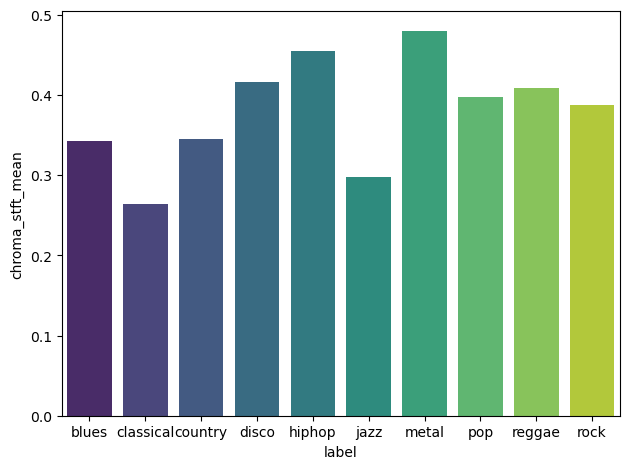

In [137]:
sns.barplot(data=df_genre, x="label", y="chroma_stft_mean", palette="viridis")
plt.tight_layout()

/var/folders/8v/jv_ccv7x6bb679_h5m_hgz0h0000gn/T/ipykernel_64475/2305677.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_genre, x="label", y="rms_mean", palette="viridis")


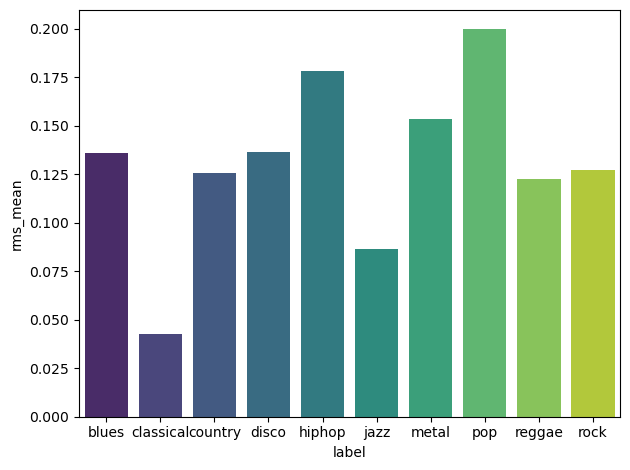

In [138]:
sns.barplot(data=df_genre, x="label", y="rms_mean", palette="viridis")
plt.tight_layout()

/var/folders/8v/jv_ccv7x6bb679_h5m_hgz0h0000gn/T/ipykernel_64475/2833879772.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_genre, x="label", y="spectral_centroid_mean", palette="viridis")


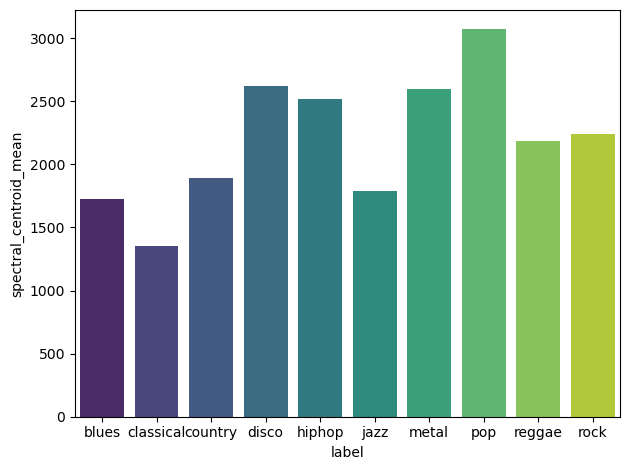

In [139]:
sns.barplot(data=df_genre, x="label", y="spectral_centroid_mean", palette="viridis")
plt.tight_layout()

/var/folders/8v/jv_ccv7x6bb679_h5m_hgz0h0000gn/T/ipykernel_64475/922197510.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_genre, x="label", y="spectral_bandwidth_mean", palette="viridis")


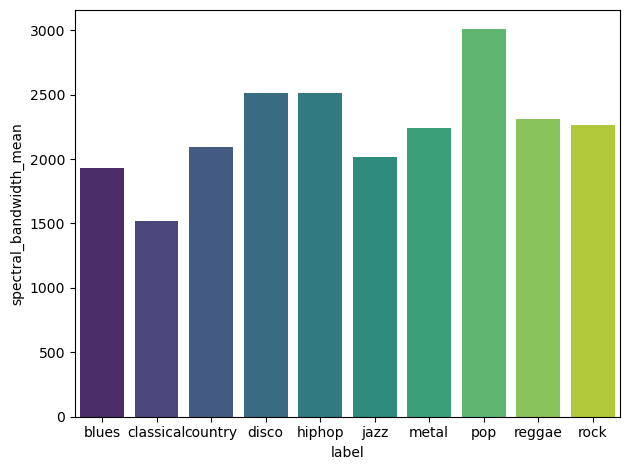

In [140]:
sns.barplot(data=df_genre, x="label", y="spectral_bandwidth_mean", palette="viridis")
plt.tight_layout()

/var/folders/8v/jv_ccv7x6bb679_h5m_hgz0h0000gn/T/ipykernel_64475/594047857.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_genre, x="label", y="rolloff_mean", palette="viridis")


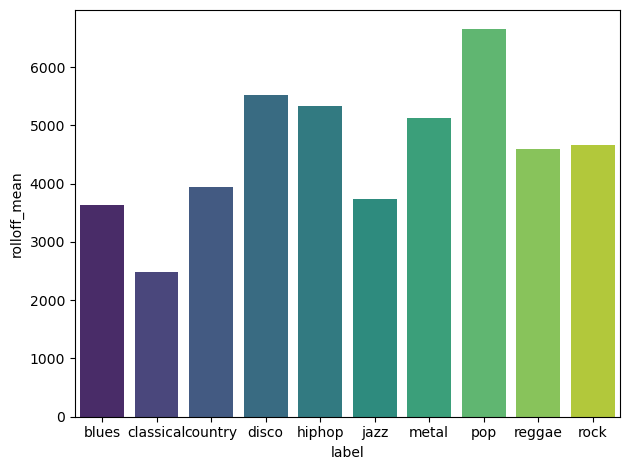

In [141]:
sns.barplot(data=df_genre, x="label", y="rolloff_mean", palette="viridis")
plt.tight_layout()

/var/folders/8v/jv_ccv7x6bb679_h5m_hgz0h0000gn/T/ipykernel_64475/873853185.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="label", y="rolloff_mean", palette="viridis")


<Axes: xlabel='label', ylabel='rolloff_mean'>

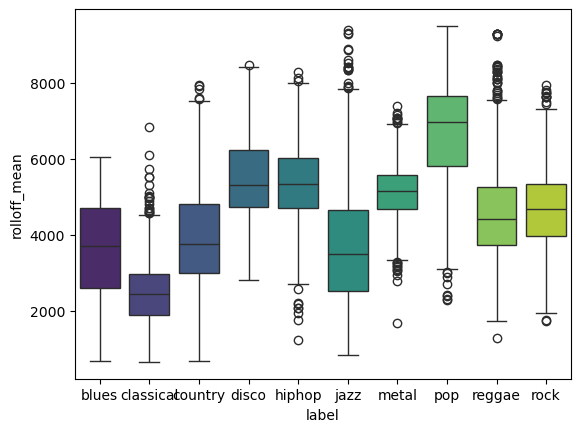

In [142]:
sns.boxplot(data=df, x="label", y="rolloff_mean", palette="viridis")

### Preprocessing

In [143]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [144]:
df.drop(["filename", "length"], axis=1, inplace=True)

In [145]:
genres = pd.get_dummies(df["label"])
df.drop("label", axis=1, inplace=True)
df = pd.concat([df, genres], axis=1)
df.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,True,False,False,False,False,False,False,False,False,False
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,True,False,False,False,False,False,False,False,False,False
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,True,False,False,False,False,False,False,False,False,False
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,True,False,False,False,False,False,False,False,False,False
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,True,False,False,False,False,False,False,False,False,False


In [146]:
genres.columns

Index(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal',
       'pop', 'reggae', 'rock'],
      dtype='object')

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X = df.drop(genres.columns, axis=1).values
y = df[genres.columns].values

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [150]:
from sklearn.preprocessing import MinMaxScaler

In [151]:
mms = MinMaxScaler()

In [152]:
X_train = mms.fit_transform(X_train)

In [153]:
X_test = mms.transform(X_test)

### Creating and running the model

In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [155]:
model = Sequential()

model.add(Dense(57, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(29, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(15, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [156]:
from tensorflow.keras.callbacks import EarlyStopping

In [157]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)

In [158]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
219/219 [==============================] - 1s 1ms/step - loss: 2.2305 - accuracy: 0.1683 - val_loss: 2.0072 - val_accuracy: 0.3600
Epoch 2/600
219/219 [==============================] - 0s 839us/step - loss: 1.9464 - accuracy: 0.2894 - val_loss: 1.6684 - val_accuracy: 0.4027
Epoch 3/600
219/219 [==============================] - 0s 963us/step - loss: 1.7551 - accuracy: 0.3426 - val_loss: 1.5144 - val_accuracy: 0.4464
Epoch 4/600
219/219 [==============================] - 0s 917us/step - loss: 1.6361 - accuracy: 0.3814 - val_loss: 1.4289 - val_accuracy: 0.4711
Epoch 5/600
219/219 [==============================] - 0s 836us/step - loss: 1.5813 - accuracy: 0.3928 - val_loss: 1.3793 - val_accuracy: 0.4962
Epoch 6/600
219/219 [==============================] - 0s 824us/step - loss: 1.5347 - accuracy: 0.4134 - val_loss: 1.3279 - val_accuracy: 0.5088
Epoch 7/600
219/219 [==============================] - 0s 830us/step - loss: 1.4961 - accuracy: 0.4297 - val_loss: 1.3047 - val_accu

### Evaluating the model

In [159]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,2.230484,0.168311,2.007159,0.360027
1,1.946411,0.289432,1.668418,0.402736
2,1.755108,0.342628,1.514375,0.446446
3,1.636148,0.381381,1.428945,0.471138
4,1.581329,0.392821,1.379341,0.496163


<Axes: >

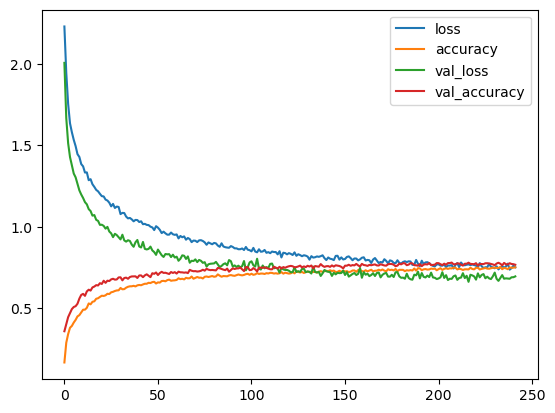

In [160]:
losses.plot()

In [161]:
pred = model.predict(X_test)
pred[0]

94/94 [==============================] - 0s 370us/step


array([6.2972089e-25, 0.0000000e+00, 1.4875070e-33, 1.2180416e-06,
       9.9841130e-01, 0.0000000e+00, 9.4895748e-18, 1.2436684e-07,
       1.5873121e-03, 2.7109819e-16], dtype=float32)

In [162]:
pred_classes = np.argmax(pred, axis=1)
pred_classes

array([4, 3, 1, ..., 0, 1, 0])

In [166]:
y_test_classes = np.argmax(y_test, axis=1)
y_test_classes

array([4, 3, 1, ..., 0, 1, 0])

In [164]:
from sklearn.metrics import classification_report, confusion_matrix

In [167]:
print(classification_report(y_test_classes, pred_classes))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       303
           1       0.90      0.93      0.91       310
           2       0.64      0.80      0.71       306
           3       0.73      0.63      0.67       286
           4       0.72      0.75      0.74       278
           5       0.80      0.78      0.79       286
           6       0.88      0.86      0.87       305
           7       0.87      0.83      0.85       318
           8       0.84      0.67      0.75       315
           9       0.54      0.57      0.55       290

    accuracy                           0.77      2997
   macro avg       0.77      0.77      0.77      2997
weighted avg       0.77      0.77      0.77      2997



In [168]:
print(confusion_matrix(y_test_classes, pred_classes))

[[259   0   5   2   1   9   8   0   2  17]
 [  0 287   6   0   0  15   0   0   0   2]
 [ 15   3 245   1   0  11   0   2   5  24]
 [  7   0  12 180  17   3   3  12   3  49]
 [  3   1   7  14 209   1  13  10  16   4]
 [ 11  24  24   0   0 223   0   1   0   3]
 [  7   0   2   3   8   0 261   0   0  24]
 [  0   1  17  14  16   1   0 263   3   3]
 [  8   0  21  11  33   4   3  12 211  12]
 [ 16   2  46  23   5  13   9   2  10 164]]
